In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the database
conn = sqlite3.connect("./data/nutrition.db")
cur = conn.cursor()

# Query the table
# search_term = "%Coconut Oil%"
# cur.execute("SELECT * FROM food WHERE gtin_upc = ?", (78742157931,))
# rows = cur.fetchall()
# print(len(rows))
# for food in rows:
#     print(food)

# cur.execute("SELECT * FROM walmart_price WHERE product_name LIKE ? AND brand LIKE ?", (search_term, 'Great Value'))
# rows = cur.fetchall()
# print(len(rows))
# for row in rows:
#     print(row)

In [2]:
df = pd.read_sql_query("SELECT * FROM food", conn)
df.isna().sum()

fdc_id                    0
description               1
publication_date          0
brand_owner            5362
brand_name            96195
subbrand_name        564212
gtin_upc                  0
serving_size           7855
serving_size_unit      7856
market_country            0
dtype: int64

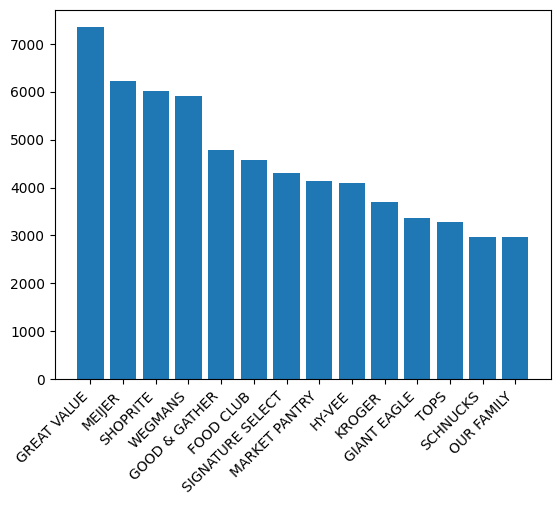

In [3]:
df = pd.read_sql_query("""
                       SELECT brand_name, COUNT(*) as brand_count 
                       FROM food 
                       GROUP BY brand_name
                       ORDER BY brand_count DESC
                       LIMIT 15
                       """, conn)
df = df.dropna()

plt.bar(x=df.brand_name, height=df.brand_count, width=0.8)
plt.xticks(rotation=45, ha='right')
plt.show()

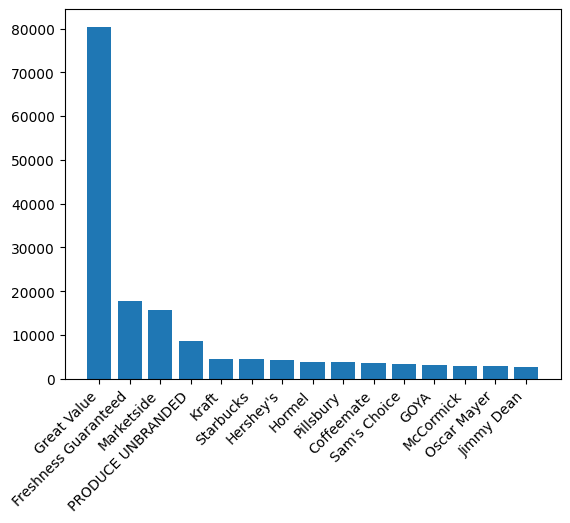

In [4]:
df = pd.read_sql_query("""
                       SELECT brand, COUNT(*) as brand_count 
                       FROM walmart_price 
                       GROUP BY brand
                       ORDER BY brand_count DESC
                       LIMIT 15
                       """, conn)

plt.bar(x=df.brand, height=df.brand_count, width=0.8)
plt.xticks(rotation=45, ha='right')
plt.show()

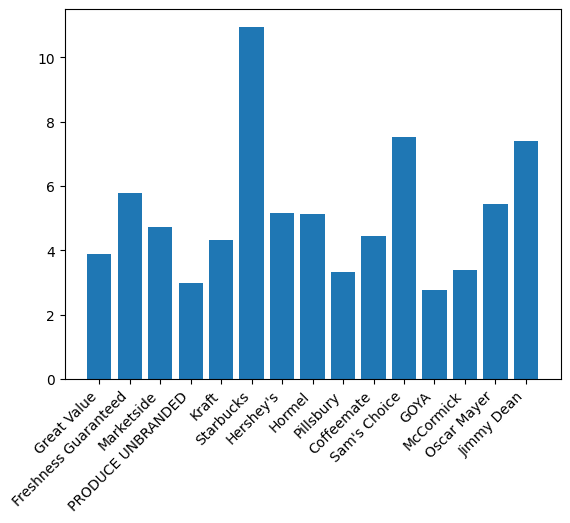

In [5]:
df = pd.read_sql_query("""
                       SELECT brand, AVG(price_current) as avg_pric, COUNT(*) as brand_count 
                       FROM walmart_price 
                       GROUP BY brand
                       ORDER BY brand_count DESC
                       LIMIT 15
                       """, conn)

plt.bar(x=df.brand, height=df.avg_pric, width=0.8)
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
conn.close()